In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline

In [2]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): (K, n) centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """

    distances = np.linalg.norm(X[:, np.newaxis, :] - centroids, axis=2)**2
    idx = np.argmin(distances, axis=1)
    
    return idx

In [3]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    
    # Useful variables
    m, n = X.shape
    
    centroids = np.zeros((K, n))
    
    for i in range(K):
        centroids[i] = np.mean(X[idx == i], axis=0)
    
    return centroids

In [4]:
def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

In [5]:
def compute_centroids_cost(X, idx, centroids):
    squared_dists = np.sum((X - centroids[idx])**2, axis=1)
    cost = np.mean(squared_dists)
    return cost

In [6]:
def run_kMeans(X, K, max_iters=10, initialize_iters=50):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """

    # Initialize values
    m = X.shape[0]
    idx = np.zeros(m)
    best_centroids = np.zeros(m)
    best_cost = np.inf
    # Run K-Means with random initialization for initialize_iters times
    for i in range(initialize_iters):
        # Set initial centroids by picking random examples from the dataset
        centroids = kMeans_init_centroids(X, K)
        # Run K-Means
        for i in range(max_iters):
            # For each example in X, assign it to the closest centroid
            idx = find_closest_centroids(X, centroids)

            # Given the memberships, compute new centroids
            new_centroids = compute_centroids(X, idx, K)
            if np.array_equal(centroids, new_centroids):
                break
            else:
                centroids = new_centroids
        # Choose the best centroids
        cost = compute_centroids_cost(X, idx, centroids)
        if cost < best_cost:
            best_centroids = centroids
            best_cost = cost

    return centroids, idx

In [7]:
def plot_centroids(X, idx, centroids):
    plt.figure(figsize=(8, 6))
    # Define colormap to match Figure 1 in the notebook
    cmap = ListedColormap(["red", "green", "blue"])
    c = cmap(idx)
    # plots data points in X, coloring them so that those with the same
    # index assignments in idx have the same color
    plt.scatter(X[:, 0], X[:, 1], facecolors='none', edgecolors=c, linewidth=0.3)
    # Plot the centroids as black 'x's
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='k', linewidths=3)
    plt.show()

In [8]:
X = np.load("data/kmeans.npy")

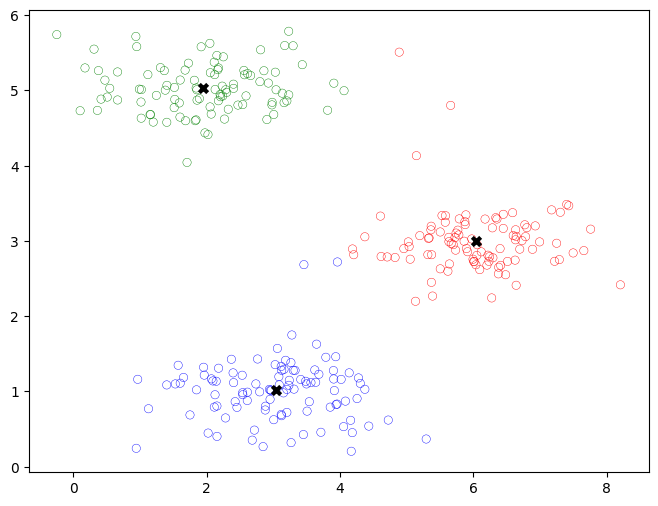

In [9]:
# Set number of centroids and max number of iterations
K = 3
max_iters = 10
randomly_initialized_iters = 50

for i in range(randomly_initialized_iters):
    # Run K-Means
    centroids, idx = run_kMeans(X, K, max_iters, randomly_initialized_iters)

plot_centroids(X, idx, centroids)